In [67]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.matlib

import random

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [68]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [69]:
features = pd.read_csv('EI_data.csv')
labelss = pd.read_csv('EI_labels.csv')


In [70]:
features = features.to_numpy()
labelss = labelss.to_numpy()


In [71]:
features

array([[0.13270661, 0.03617563, 0.12173709, ..., 0.34720611, 0.48574554,
        0.65869341],
       [0.13166168, 0.03683112, 0.12185311, ..., 0.34726469, 0.48586955,
        0.65871899],
       [0.12987794, 0.03715049, 0.12216837, ..., 0.34744939, 0.48604905,
        0.65868183],
       ...,
       [0.00505007, 0.02695383, 0.03264894, ..., 0.38687323, 0.69769205,
        0.7472824 ],
       [0.00503995, 0.02689944, 0.03254931, ..., 0.38649313, 0.69720394,
        0.74729275],
       [0.0050346 , 0.02683473, 0.03246494, ..., 0.38612522, 0.69677755,
        0.74732841]])

In [72]:
X_valid = pd.read_csv("EI_data_Logo.csv").values
y_valid = pd.read_csv("EI_labels_Logo.csv").values

# Stratify using one column (e.g. column 0) from multi-label one-hot encoding
y_strat = labelss[:, 0]  # you may change to another class column if needed

# Split 15% of remaining data for testing
X_train, X_test, y_train, y_test = train_test_split(
    features, labelss,
    test_size=0.15,
    stratify=y_strat
)

In [73]:
X_valid.shape

(7799, 666)

In [74]:
# build the model and train it
NUM_GESTURES = 26
model = tf.keras.Sequential()
#model.add(tf.keras.Input(shape=(2160)))
model.add(tf.keras.layers.Input(shape=(666,1)))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu')) #
model.add(tf.keras.layers.Dropout(0.2)) #0.5
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='RMSprop', loss='CategoricalCrossentropy', metrics=['accuracy']) #Nadam
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=5, batch_size=32) #betch_size=10



Epoch 1/5
2072/2072 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.0553 - loss: 3.2029 - val_accuracy: 0.1892 - val_loss: 2.7234
Epoch 2/5
2072/2072 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.1941 - loss: 2.6791 - val_accuracy: 0.3277 - val_loss: 2.2197
Epoch 3/5
2072/2072 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.2872 - loss: 2.3258 - val_accuracy: 0.4494 - val_loss: 1.8971
Epoch 4/5
2072/2072 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.3573 - loss: 2.0675 - val_accuracy: 0.5001 - val_loss: 1.6472
Epoch 5/5
2072/2072 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.4214 - loss: 1.8550 - val_accuracy: 0.5745 - val_loss: 1.4205


In [75]:
#model.save('Becky_textile.h5')
scores = model.evaluate(X_valid,y_valid,verbose = 0)
print(scores)

[62.85663604736328, 0.0616745725274086]


In [76]:
kk = model.predict(X_valid)
re = np.argmax(kk,axis=1)
labelss = y_valid
tt = np.argmax(labelss,axis=1)

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(47.25, 0.5, 'true')

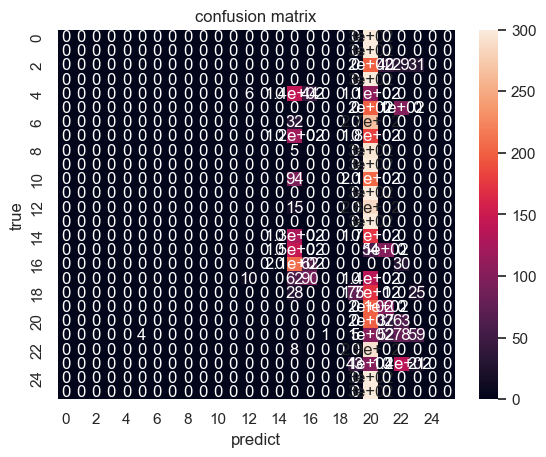

In [77]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
f,ax=plt.subplots()
y_true = tt
y_pred = re
C2= confusion_matrix(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
sns.heatmap(C2,annot=True,ax=ax) #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

In [78]:
scores = model.evaluate(X_valid,y_valid,verbose = 0)
print(scores)

[62.85663604736328, 0.0616745725274086]
